# Customer Personality Clustering

## Agenda:
1. [Introduction](#1)
    - 1.1 [Context](#2)
    - 1.2 [Columns Description](#3)
    - 1.3 [Objective](#4)
2. [Data Preparation](#5)
    - 2.1 [Packages & Helping Functions](#6)
    - 2.2 [Data Loading](#7)
    - 2.3 [Understanding Data](#8)
    - 2.4 [Data Cleaning](#9)
3. [Exploratory Data Analysis](#10)
    - 3.1 [Univariate Analysis](#11)
    - 3.2 [Bivariate Analysis](#12)
4. [Modeling](#13)
    - 4.2 [Preprocessing](#14)
    - 4.3 [Kmeans model building](#15)
5. [Conclusion](#16)

<h1><center>1. Introduction</center></h1><a id=1></a>

### 1.1 Context <a id=2></a>
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. It helps a business to modify its product based on its target customers from different types of customer segments. 

This [dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) contains 29 variables and 2240 observations about different customers.

### 1.2 Columns Description <a id=3></a>
| Column | Description |
| :- | :- |
| ID | Customer's unique identifier. |
| Year_Birth | Customer's birth year. |
| Education | Customer's education level. |
| Marital_Status | Customer's marital status. |
| Income | Customer's yearly household income. |
| Kidhome | Number of children in customer's household. |
| Teenhome | Number of teenagers in customer's household. |
| Dt_Customer | Date of customer's enrollment with the company. |
| Recency | Number of days since customer's last purchase. |
| MntWines | Amount spent on wine in last 2 years. |
| MntFruits | Amount spent on fruits in last 2 years. |
| MntMeatProducts | Amount spent on meat in last 2 years. |
| MntFishProducts | Amount spent on fish in last 2 years. |
| MntSweetProducts | Amount spent on sweets in last 2 years. |
| MntGoldProds | Amount spent on gold in last 2 years. |
| NumDealsPurchases | Number of purchases made with a discount. |
| NumWebPurchases | Number of purchases made through the company’s web site. |
| NumCatalogPurchases | Number of purchases made using a catalogue. |
| NumStorePurchases | Number of purchases made directly in stores. |
| NumWebVisitsMonth | Number of visits to company’s web site in the last month. |
| AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise. |
| AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise. |
| AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise. |
| AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise. |
| AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise. |
| Complain | 1 if customer complained in the last 2 years, 0 otherwise. |
| Response | 1 if customer accepted the offer in the last campaign, 0 otherwise. |

### 1.3 Objective <a id=4></a>

The aim of this notebook is to perform a descriptive and exploratory analysis of the data in order to understand how the phenomena of each variable behave individually and transversely and to perform an unsupervised clustering of data to optimize the significance of each customer to the business.

<h1><center>2. Data Preparation</center></h1><a id=5></a>

### 2.1 Packages & Helping Functions <a id=6></a>

In [1]:
# For Loading and Manipulating data.
import pandas as pd
import numpy as np

# For visualization purposes.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# For scaling and clustering models.
import mlpack


# To evaluate different models
from sklearn.metrics import *

### 2.2 Data Loading<a id=7></a>

In [2]:
!wget -q http://lab.mlpack.org/data/marketing_campaign.csv

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

### 2.3 Understanding Data <a id=8></a>

In [4]:
pd.set_option('display.max_columns', None)          
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0


#### The shape of the data

In [5]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (2240, 29)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

----------

#### Summary statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


`Z_CostContact` and `Z_Revenue` have 0 standard deviation.

### 2.3 Data Cleaning <a id=9></a>

#### Dealing with null values

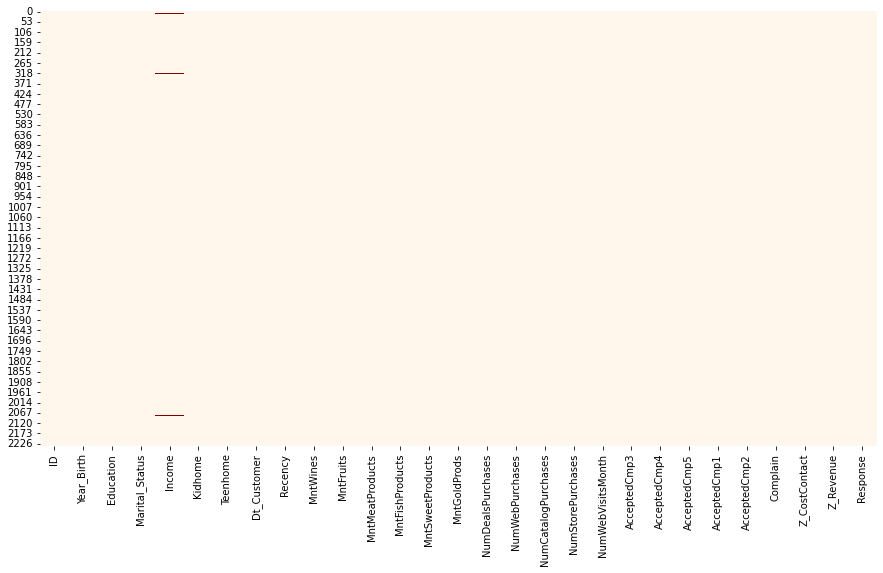

In [8]:
plt.figure(figsize=(15,8));
sns.heatmap(df.isnull(), cbar=False, cmap="OrRd")
plt.show();

In [9]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

Income ==> Missing Values : 24, dtypes : float64


- No columns has any missing values except `Income` that has 24 missing values.
- Since it's a numeric feature, we will impute it with the mean.

In [10]:
print('Skewness before filling nans', round(df['Income'].skew(), 3))

df["Income"].fillna(df["Income"].mean(), inplace=True)

print('Skewness after filling nans', round(df['Income'].skew(), 3))

Skewness before filling nans 6.763
Skewness after filling nans 6.8


- There is almost no data distortion after filling nans.

------------

#### Duplicates

In [11]:
df.duplicated().sum()

0

-----------------

#### Getting age

In [12]:
# assuming this data was collected in 2021
df["Age"] = 2021 - df["Year_Birth"]

#### Getting number of days since customer's enrollment with the company

In [13]:
df['DaysEngaged'] = (pd.to_datetime('01-01-2021') - pd.to_datetime(df['Dt_Customer'], dayfirst=True)).dt.days

#### Combining all amount spent on all categories

In [14]:
df["TotalSpent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

#### Total number of children in the house

In [15]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

#### Total number of accepted offers

In [16]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#### Total number of purchases

In [17]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

#### Mapping the values in `Marital_Status` to only 2 values

In [18]:
df['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace=True)
df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single', inplace=True)

#### Mapping the values in `Education` to only 2 values

In [19]:
df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'],'Post Graduate', inplace=True)  
df['Education'].replace(['Basic'], 'Under Graduate', inplace=True)

-------------

#### Dropping unnecessary columns

In [20]:
df.drop(['ID', 'Z_CostContact','Z_Revenue', 'Year_Birth', 'Dt_Customer', 'MntWines', 'MntFruits'
        , 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
        , 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3'
        , 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases'
        , 'NumStorePurchases', 'NumDealsPurchases'], axis=1, inplace=True)

In [21]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,DaysEngaged,TotalSpent,Children,TotalAcceptedCmp,TotalPurchases
0,Post Graduate,Single,58138.0,58,7,0,64,3041,1617,0,1,25
1,Post Graduate,Single,46344.0,38,5,0,67,2491,27,2,0,6
2,Post Graduate,Relationship,71613.0,26,4,0,56,2690,776,0,0,21
3,Post Graduate,Relationship,26646.0,26,6,0,37,2517,53,1,0,8
4,Post Graduate,Relationship,58293.0,94,5,0,40,2539,422,1,0,19


In [22]:
num_cols = ['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'DaysEngaged', 'TotalSpent', 'TotalAcceptedCmp', 'TotalPurchases']

### Summary
- The dataset has 2240 rows.
- `Z_CostContact` and `Z_Revenue` have 0 standard deviation so they were dropped.
- No columns has any missing values except Income that has 24 missing values. We replaced the NaN values with the mean.
- There are no duplicated values.
- Extracted `Age` of date of birth.
- Extracted `DaysEngaged` of date of customer's first enrollment with the company.
- Combined all amount spent on all categories in a new column `TotalSpent`.
- Combined number of children in the house in a new column `Children`.
- Combined number of accepted offers in a new column `TotalAcceptedCmp`.
- Combined number of purchases in a new column `TotalPurchases`.
- Mapped the values in `Marital_Status` to either relationship or single.
- Mapped the values in `Education` to either under graduate or post graduate.

<h1><center>3. Exploratory Data Analysis</center></h1><a id=10></a>

### 3.1 Univariate Analysis <a id=11></a>

In [23]:
base_color = sns.color_palette()[0]

Let's take a look at the distribution of the numerical variables.

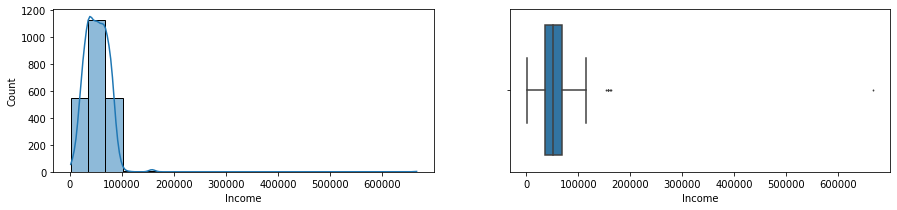

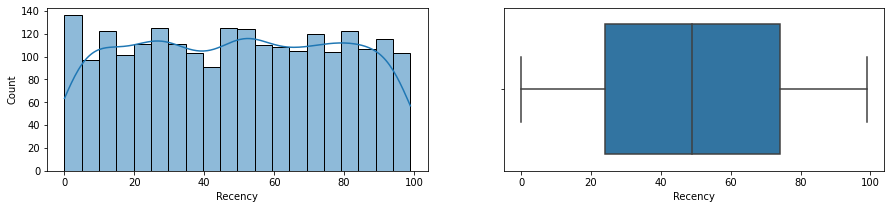

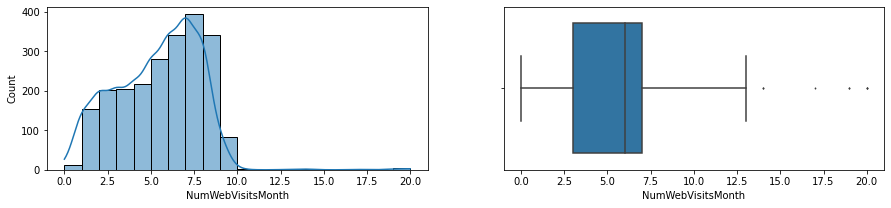

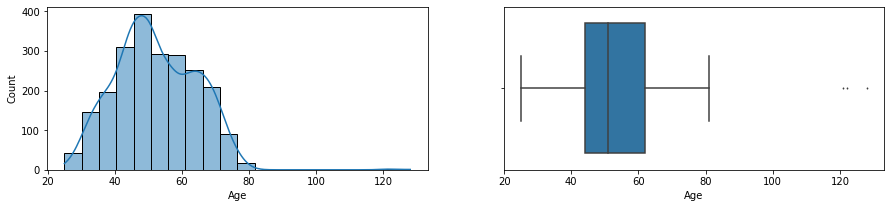

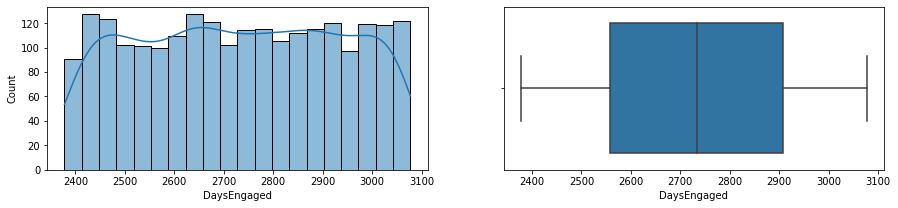

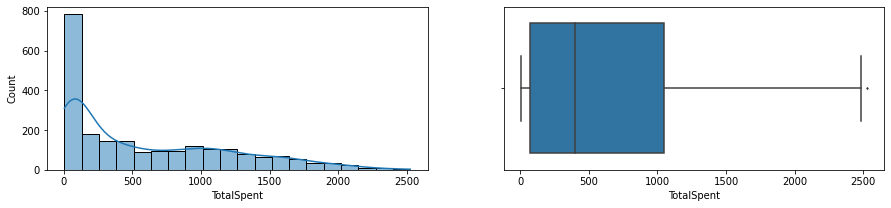

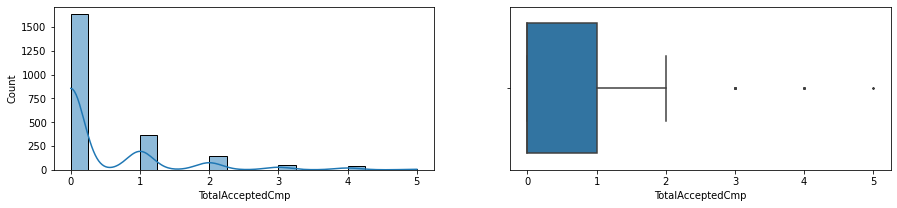

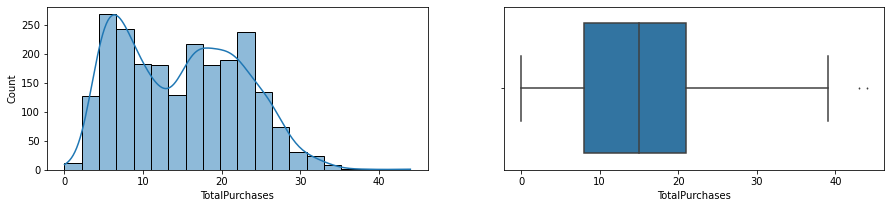

In [24]:
for i in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(data=df, x=i, bins=20, kde=True, ax=axs[0]);
    sns.boxplot(data=df, x=i, ax=axs[1], color=base_color, fliersize=1);

Observations:
- Nearly all features are positively skewed.
- `Recency` and `DaysEngaged` have a roughly uniform distribution.

------------

Now, let's take a look at categorical variables.

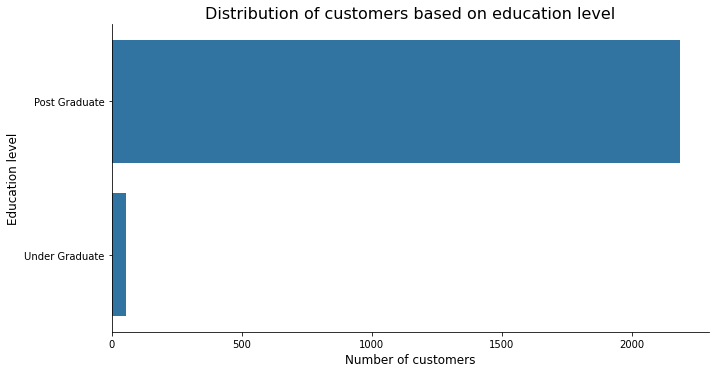

In [25]:
ed_order = df['Education'].value_counts().index
sns.catplot(y="Education", data=df, color=base_color, 
               order=ed_order, kind='count', aspect=2);
plt.title('Distribution of customers based on education level', fontsize=16)
plt.ylabel('Education level', fontsize=12)
plt.xlabel('Number of customers', fontsize=12);
plt.show();

In [26]:
df['Education'].value_counts()

Post Graduate     2186
Under Graduate      54
Name: Education, dtype: int64

- The vast majority of the customers are post graduate.
- Only 54 customers have not graduated yet.

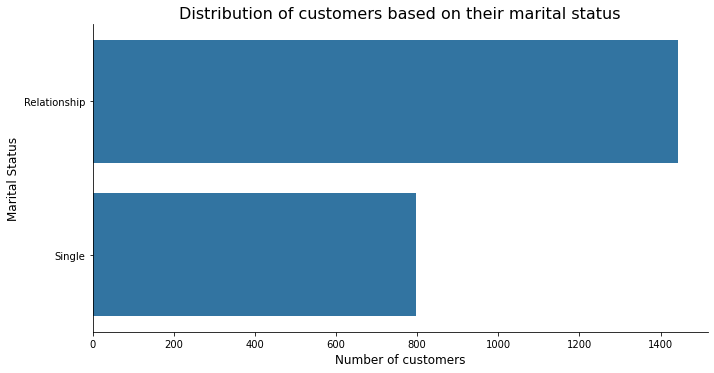

In [27]:
ms_order = df['Marital_Status'].value_counts().index
sns.catplot(y="Marital_Status", data=df, color=base_color, 
               order=ms_order, kind='count', aspect=2);
plt.title('Distribution of customers based on their marital status', fontsize=16)
plt.ylabel('Marital Status', fontsize=12)
plt.xlabel('Number of customers', fontsize=12);
plt.show();

In [28]:
df['Marital_Status'].value_counts() / len(df) * 100

Relationship    64.464286
Single          35.535714
Name: Marital_Status, dtype: float64

- 65% of the customers are in a relationship and 35% are single.

### Observations
From the previous visualizations, we can conclude that:
- Nearly all numerical features are positively skewed.
- `Recency` and `DaysEngaged` have a roughly uniform distribution.
- The vast majority of the customers are post graduate.
- Only 54 customers have not graduated yet.
- 65% of the customers are in a relationship and 35% are single.

--------------------------

### 3.2 Bivariate Analysis <a id=12></a>

To start off with, I want to look at the **pairwise correlations** present between features in the data.

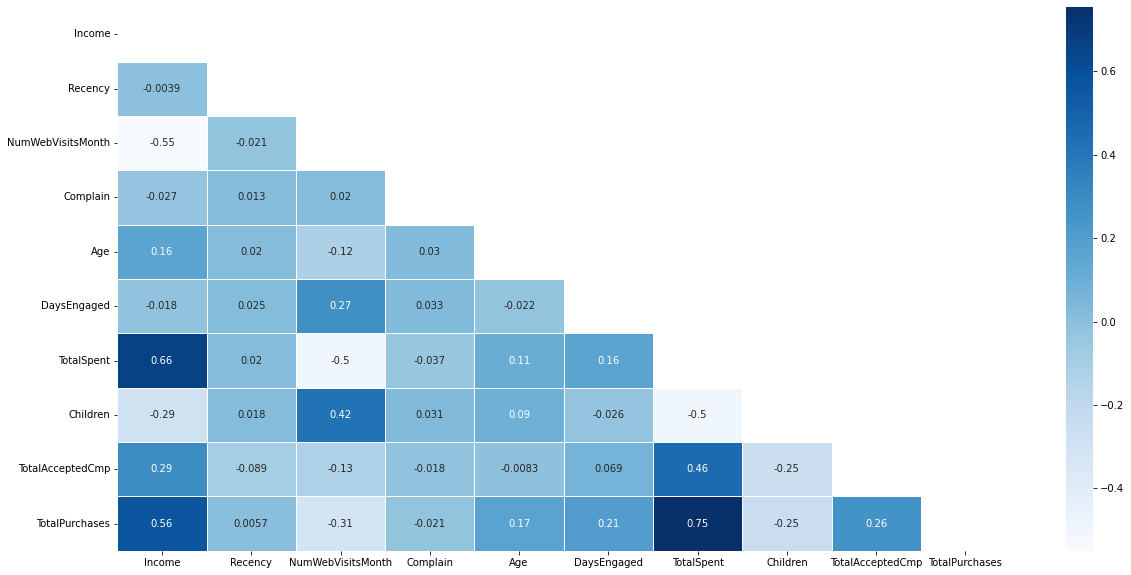

In [29]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", mask=mask, linewidth=0.5);

- There is a relatively strong correlation between `TotalPurchases`, `TotalSpent` and `Income`.

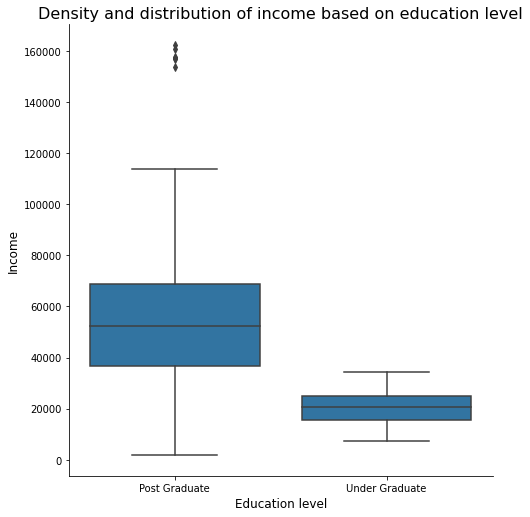

In [30]:
# abandonning extreme values for better visualizations.
dfsub = df[df.Income < 200000] 
sns.catplot(data=dfsub, x='Education', y='Income', kind='box', color=base_color, 
            height=7);
plt.title('Density and distribution of income based on education level', fontsize=16)
plt.ylabel('Income', fontsize=12)
plt.xlabel('Education level', fontsize=12);
plt.show();

In [31]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.groupby("Education")["Income"].describe().T

Education,Post Graduate,Under Graduate
count,2186.0,54.0
mean,53036.3,20306.3
std,24811.4,6235.1
min,1730.0,7500.0
25%,36628.8,15405.2
50%,52247.3,20744.0
75%,68695.0,24882.0
max,666666.0,34445.0


- It's clear that post graduates make much more on average than under graduates.
- Post graduates make roughly 50K usd on average while under graduates make 20K usd on average.

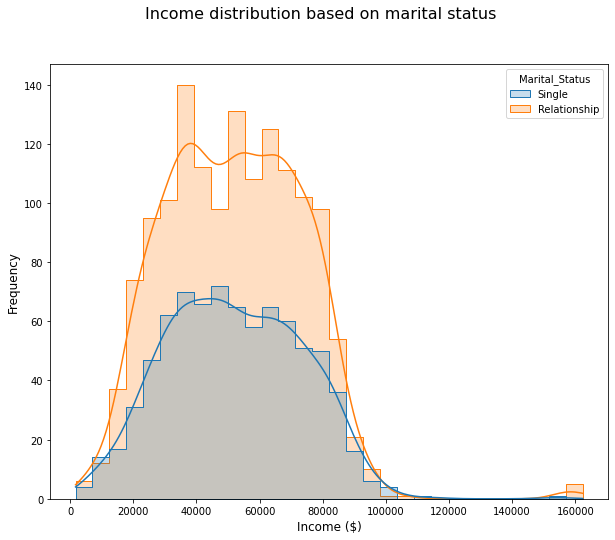

In [32]:
dfsub = df[df['Income'] < 200000]
plt.figure(figsize=[10, 8])
ax = sns.histplot(data=dfsub, x='Income', hue='Marital_Status', bins=30, kde=True, element='step')
plt.suptitle('Income distribution based on marital status', fontsize=16)
plt.xlabel('Income ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.show();

In [33]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.groupby("Marital_Status")["Income"].describe().T

Marital_Status,Relationship,Single
count,1444.0,796.0
mean,52333.4,52090.9
std,26873.1,21324.0
min,2447.0,1730.0
25%,35196.0,35791.0
50%,52196.5,51320.0
75%,67911.0,68655.0
max,666666.0,153924.0


- The count of customers in a relationship in the dataset is roughly double that of those who are single.
- Marital status doesn't affect income level.

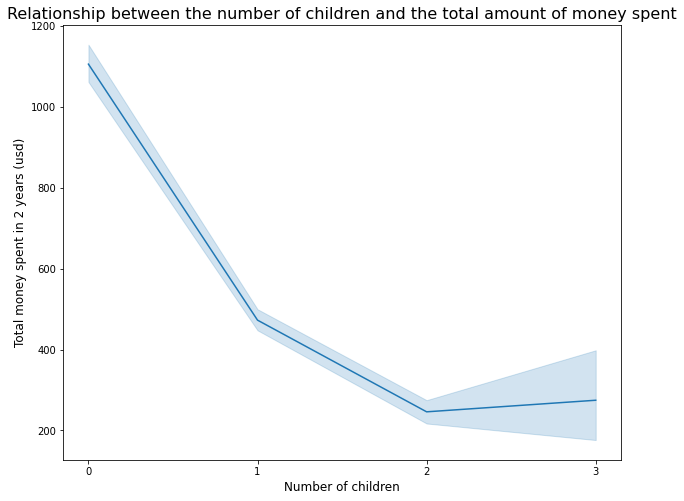

In [34]:
plt.figure(figsize=[10, 8])
sns.lineplot(data=df, x="Children", y="TotalSpent")
plt.title('Relationship between the number of children and the total amount of money spent', fontsize=16)
plt.ylabel('Total money spent in 2 years (usd)', fontsize=12)
plt.xlabel('Number of children', fontsize=12);
plt.xticks([0, 1, 2, 3])
plt.show();

- The more children the customer has, the less he spends on products.

### Summary
- There is a relatively strong correlation between TotalPurchases, TotalSpent and Income.
- Post graduates make roughly 50K usd on average while under graduates make 20K usd on average.
- The count of customers in a relationship in the dataset is roughly double that of those who are single.
- Marital status doesn't affect income level.
- The more children the customer has, the less he spends on products.

<h1><center>4. Modeling</center></h1><a id=13></a>

### 4.2 Preprocessing <a id=14></a>

**Label-Encoding Binary Categorical Variables**

In [35]:
cols_to_encode = ['Education', 'Marital_Status']

In [36]:
def LabelEncoder(data):
    for col in data.columns:
        if col in cols_to_encode:
            uniqs = list(data[col].unique())
            data[col] = data[col].apply(lambda x: uniqs.index(x))
    return data

In [37]:
df.sort_values(by='TotalSpent', inplace=True, ignore_index=True)

In [38]:
dfmodel = df.copy()
dfmodel = LabelEncoder(dfmodel)

In [39]:
dfmodel.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,DaysEngaged,TotalSpent,Children,TotalAcceptedCmp,TotalPurchases
0,0,0,3502.0,56,14,0,48,2820,5,1,0,0
1,0,0,4861.0,20,14,0,56,2385,6,0,0,0
2,0,0,153924.0,81,0,0,46,2520,6,0,0,0
3,0,1,34578.0,1,6,0,49,2457,8,3,0,4
4,0,1,156924.0,85,0,0,72,2682,8,0,0,0


--------------

**Feature Scaling**

In [40]:
output = mlpack.preprocess_scale(input_=dfmodel, scaler_method='standard_scaler')
dfmodel = pd.DataFrame(output['output'])
dfmodel.columns = df.columns

In [41]:
dfmodel.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,DaysEngaged,TotalSpent,Children,TotalAcceptedCmp,TotalPurchases
0,-0.2,-1.3,-1.9,0.2,3.6,-0.1,-0.4,0.4,-1.0,0.1,-0.5,-1.9
1,-0.2,-1.3,-1.9,-1.0,3.6,-0.1,0.3,-1.7,-1.0,-1.3,-0.5,-1.9
2,-0.2,-1.3,4.1,1.1,-2.2,-0.1,-0.5,-1.0,-1.0,-1.3,-0.5,-1.9
3,-0.2,0.7,-0.7,-1.7,0.3,-0.1,-0.3,-1.4,-1.0,2.7,-0.5,-1.4
4,-0.2,0.7,4.2,1.2,-2.2,-0.1,1.7,-0.2,-1.0,-1.3,-0.5,-1.9


--------

### 4.3 Kmeans model building<a id=15></a>

### Finding the optimal number of clusters

**Silhouette Score**

- Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [42]:
silhouette_scores = []
Preds_list = []
for i in range(2,10):
    #Training the model
    output = mlpack.kmeans(input_=dfmodel, clusters=i)
    Preds = pd.DataFrame(output['output'])
    Preds = Preds.iloc[: , -1].astype(int)
    silhouette_scores.append(silhouette_score(dfmodel, Preds.values))
    Preds_list.append(Preds)

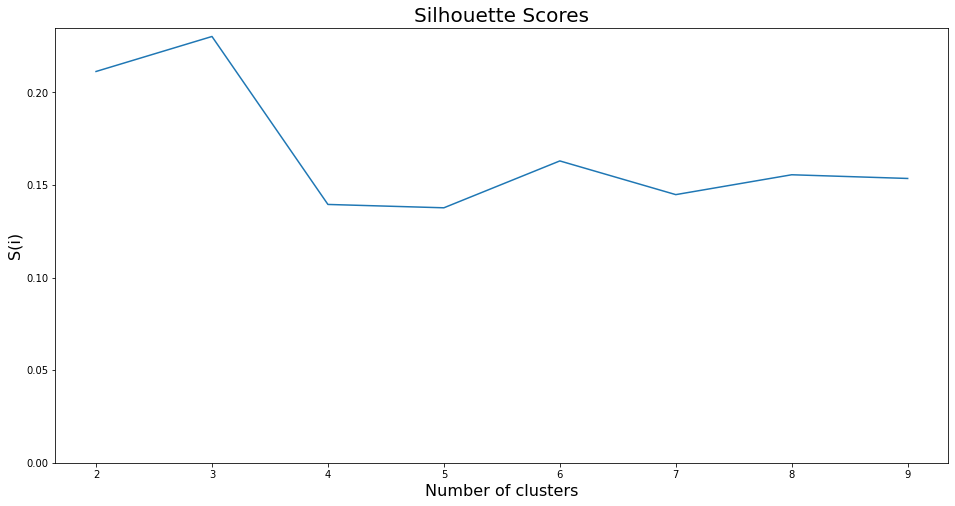

In [43]:
plt.figure(figsize=(16,8))
plt.plot(range(2,10), silhouette_scores) 
plt.ylim(ymin=0)
plt.title('Silhouette Scores', fontsize=20)
plt.xlabel('Number of clusters', fontsize=16) 
plt.ylabel('S(i)', fontsize=16) 
plt.show();

- The ideal number of clusters is 3.

In [44]:
idx = silhouette_scores.index(max(silhouette_scores))

In [45]:
PredsFinal = Preds_list[idx]

Appending the cluster value to the main dataframe.

In [46]:
df['Cluster'] = PredsFinal

In [47]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,DaysEngaged,TotalSpent,Children,TotalAcceptedCmp,TotalPurchases,Cluster
0,Post Graduate,Single,3502.0,56,14,0,48,2820,5,1,0,0,2
1,Post Graduate,Single,4861.0,20,14,0,56,2385,6,0,0,0,2
2,Post Graduate,Single,153924.0,81,0,0,46,2520,6,0,0,0,0
3,Post Graduate,Relationship,34578.0,1,6,0,49,2457,8,3,0,4,2
4,Post Graduate,Relationship,156924.0,85,0,0,72,2682,8,0,0,0,0


-------------------

## Analysing the results

**Distribution of customers based on cluster**

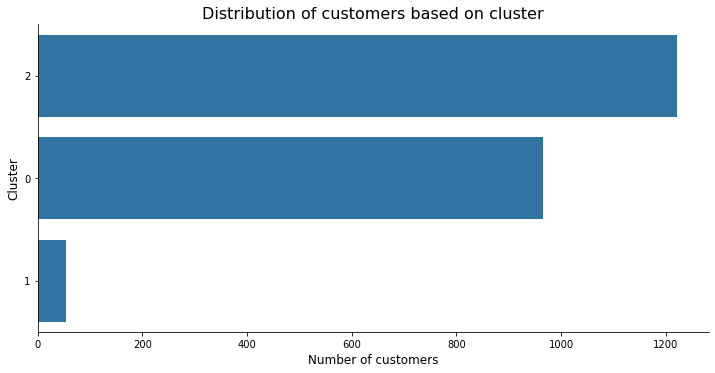

In [48]:
c_order = df['Cluster'].value_counts().index
sns.catplot(y="Cluster", data=df, color=base_color, 
               order = c_order, kind = 'count', aspect=2);
plt.title('Distribution of customers based on cluster', fontsize=16)
plt.ylabel('Cluster', fontsize=12)
plt.xlabel('Number of customers', fontsize=12);
plt.show();

- Most of the customers were categorized in cluster 0 or 2 where nearly only 50 customers are in cluster 1.

**Cluster's Profile Based On Income And Spending**

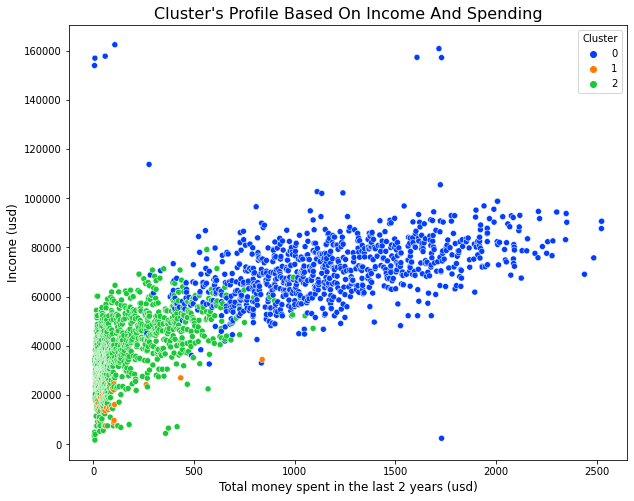

In [49]:
dfsub = df[df.Income < 200000] 
plt.figure(figsize=[10, 8])
sns.scatterplot(data=dfsub, x="TotalSpent", y="Income", hue="Cluster", palette='bright')
plt.title("Cluster's Profile Based On Income And Spending", fontsize=16)
plt.ylabel('Income (usd)', fontsize=12)
plt.xlabel('Total money spent in the last 2 years (usd)', fontsize=12)
plt.show();

In [50]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.groupby("Cluster")[["Income", "TotalSpent"]].describe().T

Cluster                 0       1       2
Income     count    965.0    54.0  1221.0
           mean   71736.3 20306.3 38257.0
           std    23580.9  6235.1 12959.7
           min     2447.0  7500.0  1730.0
           25%    62820.0 15405.2 29543.0
           50%    70515.0 20744.0 38236.0
           75%    78952.0 24882.0 47353.0
           max   666666.0 34445.0 79146.0
TotalSpent count    965.0    54.0  1221.0
           mean    1186.6    81.8   170.0
           std      455.8   123.2   178.3
           min        6.0    14.0     5.0
           25%      858.0    29.8    44.0
           50%     1143.0    57.0    86.0
           75%     1507.0    80.0   263.0
           max     2525.0   839.0  1092.0

- Customers of cluster 0 make the most money on average followed by cluster 2.
- Customers of cluster 0 made nearly 70k usd on average and spent 1k usd on products in the last couple of years.
- Customers of cluster 1 made the least money on average.

**Cluster's profile based on the number of total accepted campaigns**

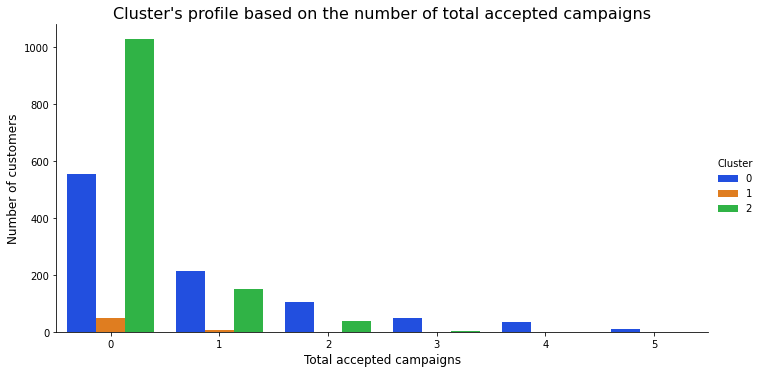

In [51]:
sns.catplot(x = "TotalAcceptedCmp", data=df, hue='Cluster', kind='count', aspect=2, palette='bright');
plt.title("Cluster's profile based on the number of total accepted campaigns", fontsize=16)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Total accepted campaigns', fontsize=12);
plt.show();

- Customers classified in cluster 1 didn't accept any campaigns with very few of them accepting only one.
- Most of cluster 2 customers also didn't accept any campaigns but almost 200 of them accepted one campgain and less than 50 of them accepted 2 campagins.
- Cluster 0 customers are the only customers who accepted more than 3 campaigns with some of them accepting even 5 campgains.

**Cluster's profile based on the number of children**

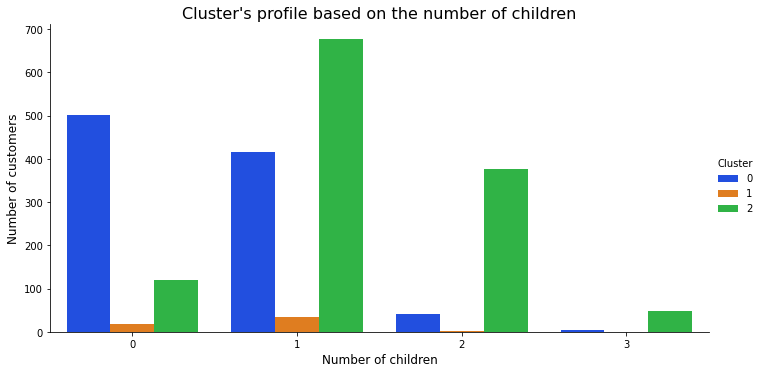

In [52]:
sns.catplot(x = "Children", data=df, hue='Cluster', kind='count', aspect=2, palette='bright');
plt.title("Cluster's profile based on the number of children", fontsize = 16)
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Number of children', fontsize=12);
plt.show();

- Most of cluster 0 customers have no kids or just one kid.
- A similar trend to cluster 0 can be seen with cluster 1 customers.
- Very few customers of cluster 2 have no kids or 3 kids while most of them have 1 or 2 kids.

**Cluster's distribution based on Education level**

<Figure size 720x576 with 0 Axes>

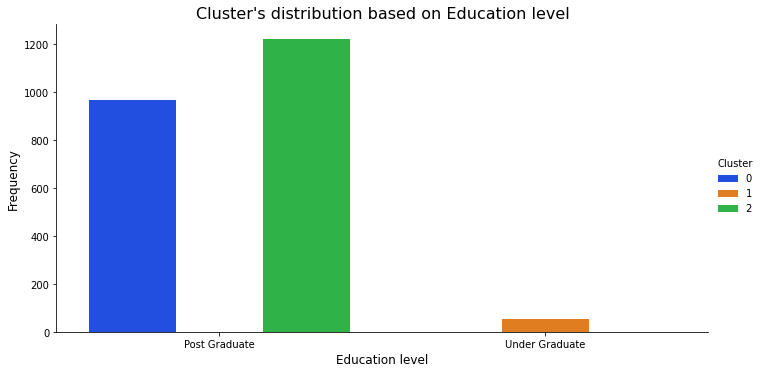

In [53]:
plt.figure(figsize=[10, 8])
sns.catplot(x = "Education", data=df, hue='Cluster', kind='count', aspect=2, palette='bright')
plt.title("Cluster's distribution based on Education level", fontsize=16)
plt.xlabel('Education level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

- Cluster 0 and 2 customers are post graduates. 
- Cluster 1 customers are under graduates.

**Cluster's distribution based on Marital Status**

<Figure size 720x576 with 0 Axes>

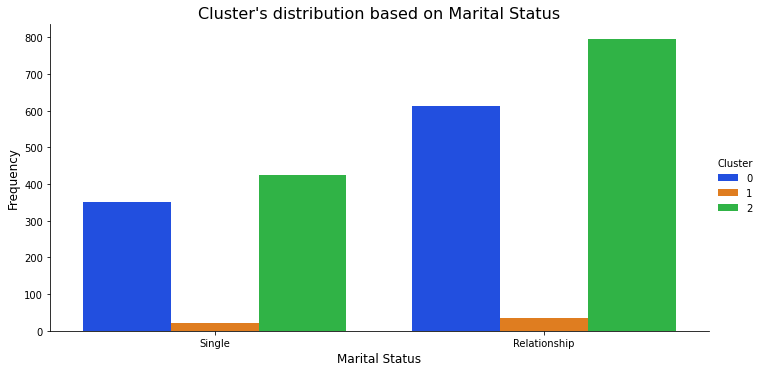

In [54]:
plt.figure(figsize=[10, 8])
sns.catplot(x="Marital_Status", data=df, hue='Cluster', kind='count', aspect=2, palette='bright')
plt.title("Cluster's distribution based on Marital Status", fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

- Nearly two thirds of cluster 0 and 2 customers are in a relationship.

**Cluster's profile based on the number of purchases made**

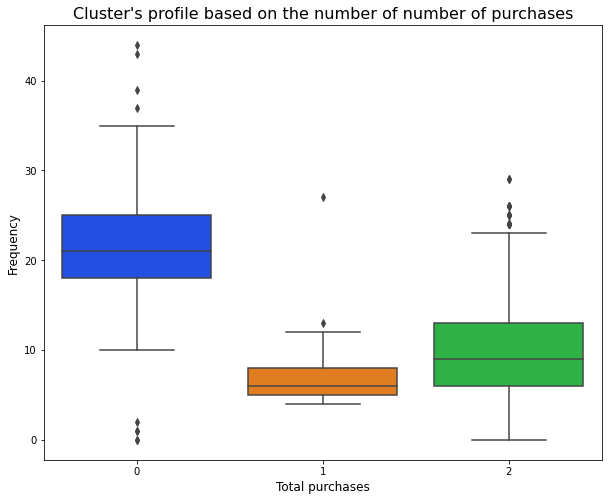

In [55]:
plt.figure(figsize=[10, 8])
sns.boxplot(x='Cluster', y='TotalPurchases', data=df, palette='bright')
plt.title("Cluster's profile based on the number of number of purchases", fontsize=16)
plt.xlabel('Total purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

In [56]:
df.groupby("Cluster")[["TotalPurchases"]].describe().T

Cluster                  0    1      2
TotalPurchases count 965.0 54.0 1221.0
               mean   21.5  7.0   10.0
               std     5.0  3.5    5.2
               min     0.0  4.0    0.0
               25%    18.0  5.0    6.0
               50%    21.0  6.0    9.0
               75%    25.0  8.0   13.0
               max    44.0 27.0   29.0

- Cluster 0 customers made noticeably more purchase than cluster 1 and 2.
- Cluster 1 customers made 7 purchases on average.
- Cluster 2 customers made 10 purchases on average.

**Cluster's profile based on age**

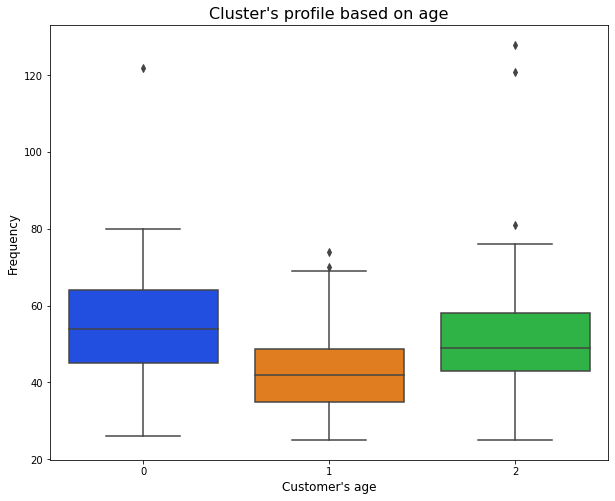

In [57]:
plt.figure(figsize=[10, 8])
sns.boxplot(x='Cluster', y='Age', data=df, palette='bright')
plt.title("Cluster's profile based on age", fontsize=16)
plt.xlabel("Customer's age", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

In [58]:
df.groupby("Cluster")[["Age"]].describe().T

Cluster       0    1      2
Age count 965.0 54.0 1221.0
    mean   54.4 43.5   50.8
    std    12.4 11.5   11.3
    min    26.0 25.0   25.0
    25%    45.0 35.0   43.0
    50%    54.0 42.0   49.0
    75%    64.0 48.8   58.0
    max   122.0 74.0  128.0

- Cluster 0 customers are the oldest on average. 
- Cluster 2 customers comes second when it comes to age.
- Cluster 1 customers are nearly 44 years old on average.

<h1><center>5. Conclusion</center></h1><a id=16></a>

### Based on above information we can divide customers into 3 clusters:-
- Highly Active Customer :- These customers belong to cluster zero.
- Moderately Active Customer :- These customers belong to cluster two.
- Least Active Customer :- These customers belong to cluster one.

--------------

**Characteristics of Highly Active Customer**
- Based on income: Customers of this cluster make the most money on average.
- Based on the number of purchases made: Customers of this cluster made more than 20 overall purchases on average. That's more than double the average of moderately active customers who come second.
- Based on education level: Post graduates.
- Based on marital status: Two thirds of customers are in a relationship.
- Based on age: Customers of this cluser are the oldest on average.

----------

**Characteristics of Moderately Active Customer**
- Based on income: Customers of this cluster make 38k usd on average. That's nearly half of what highly active customers make.
- Based on the number of purchases made: Customers of this cluster made 10 overall purchases on average. 
- Based on education level: Post graduates.
- Based on marital status: Two thirds of customers are in a relationship.
- Based on age: Customers of this cluser are 50 years old on average.

-------------

**Characteristics of Least Active Customer**
- Based on income: Customers of this cluster make 20k usd on average.
- Based on the number of purchases made: Customers of this cluster made 7 overall purchases on average. 
- Based on education level: Under graduates.
- Based on marital status: Slightly less than half of them are single.
- Based on age: Customers of this cluser are 43 years old on average.